In [1]:
from ml.stats import rmse
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler
from ml.models.linear import PolynomialRegression
from ml.algorithms.optimization import OrdinaryLeastSquares

import numpy as np
import matplotlib.pyplot as plt

## Q2

In [2]:
X, y = load_csv('./datasets/california.csv')

In [18]:
# util funcion to plot RMSE
def plot_train_test_rmse(train_rmse, test_rmse, title, xlabel, ylim, text_y):
    plt.figure(figsize=(10,6))
    num = np.arange(len(train_rmse))
    
    plt.bar(num*3, train_rmse, 1, label="Train", color='paleturquoise')
    plt.bar((num*3)+1, test_rmse, 1, label="Test", color='navajowhite')

    for i in num:
        plt.text(i*3, text_y, "{:.3f}".format(train_rmse[i]), 
            ha='center', rotation=90, fontsize=10, color='black', weight="bold")

        plt.text((i*3)+1, text_y, "{:.3f}".format(test_rmse[i]), 
            ha='center', rotation=90, fontsize=10, color='black', weight="bold")

    plt.xticks((num*3)+0.5, labels=num.astype(np.str_))
    
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel("RMSE", fontsize=20)
    plt.ylim(0, ylim)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

### Q2.a
#### Split dataset in train (80%) and test (20%) with random shuffling

In [4]:
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.8, shuffle=True)

### Q2.b
#### Train polynomial regression models with degrees from 1 to 11

In [5]:
poly_ols_all = []

for degree in range(1, 12):
    ols = OrdinaryLeastSquares()
    poly_ols = PolynomialRegression(ols, degree, scaler=MinMaxScaler)
    
    poly_ols.fit(X_train, y_train)
    
    poly_ols_all.append(poly_ols)

### Q2.c
#### Report train and test RMSE for each trained model

Degree: 1 - RMSE train: 0.7294518556967625 - RMSE test: 0.6952308874817376
Degree: 2 - RMSE train: 0.6767172640847776 - RMSE test: 0.6390881717555797
Degree: 3 - RMSE train: 0.64478319505168 - RMSE test: 0.621955213681981
Degree: 4 - RMSE train: 0.6359360777213465 - RMSE test: 0.6139073455909806
Degree: 5 - RMSE train: 0.6340218929100682 - RMSE test: 0.6120799306434189
Degree: 6 - RMSE train: 0.6299831361403136 - RMSE test: 0.6098360683757298
Degree: 7 - RMSE train: 0.6260436241064592 - RMSE test: 0.6992905723253684
Degree: 8 - RMSE train: 0.6265166357741979 - RMSE test: 0.7221466313907966
Degree: 9 - RMSE train: 0.6268818728748677 - RMSE test: 0.7470171138308406
Degree: 10 - RMSE train: 0.6267348033475804 - RMSE test: 0.6215836322036844
Degree: 11 - RMSE train: 0.6226548566515268 - RMSE test: 2.187571814621464


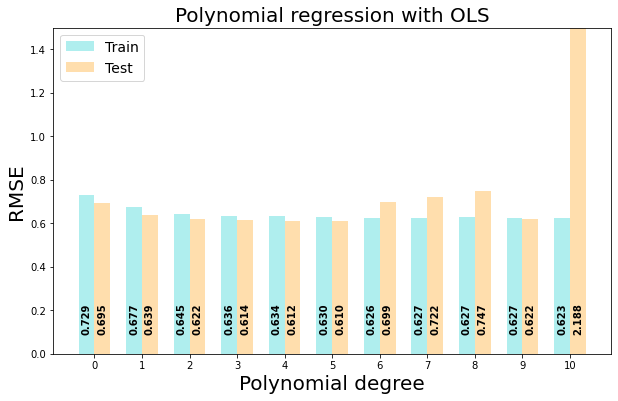

In [29]:
rmse_poly_ols_train = []
rmse_poly_ols_test = []

degree = 1
for poly_ols in poly_ols_all:
    # compute RMSE
    rmse_train = rmse(y_train, poly_ols.predict(X_train))
    rmse_test = rmse(y_test, poly_ols.predict(X_test))
    
    # store RMSE
    rmse_poly_ols_train.append(rmse_train)
    rmse_poly_ols_test.append(rmse_test)

    # print RMSE
    print("Degree:", degree, "- RMSE train:", rmse_train, "- RMSE test:", rmse_test)
    degree += 1

# plot RMSE
plot_train_test_rmse(rmse_poly_ols_train, rmse_poly_ols_test,
    title="Polynomial regression with OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)

### Q2.d

#### Train polynomial regression models with degrees 1 to 11 and regularization

In [30]:
poly_ols_reg_all = []

for degree in range(1, 12):
    ols = OrdinaryLeastSquares(regularization=0.001)
    poly_ols = PolynomialRegression(ols, degree, scaler=MinMaxScaler)
    poly_ols.fit(X_train, y_train)

    poly_ols_reg_all.append(poly_ols)

#### Report train and test RMSE

Degree: 1 - RMSE train: 0.729451907081285 - RMSE test: 0.6952459543024225
Degree: 2 - RMSE train: 0.6876259638403827 - RMSE test: 0.6561903576804964
Degree: 3 - RMSE train: 0.6703163681063679 - RMSE test: 0.6430044079408038
Degree: 4 - RMSE train: 0.6668482662548624 - RMSE test: 0.6420939995428501
Degree: 5 - RMSE train: 0.6658213256994884 - RMSE test: 0.6414978424512956
Degree: 6 - RMSE train: 0.6650795455942076 - RMSE test: 0.6409219362742699
Degree: 7 - RMSE train: 0.6645877645273086 - RMSE test: 0.6405722850231647
Degree: 8 - RMSE train: 0.6642598642290153 - RMSE test: 0.6403845925199244
Degree: 9 - RMSE train: 0.6639814219350009 - RMSE test: 0.6402229818976154
Degree: 10 - RMSE train: 0.6636668495599448 - RMSE test: 0.6399870211925064
Degree: 11 - RMSE train: 0.6632956406583995 - RMSE test: 0.6396279903299923


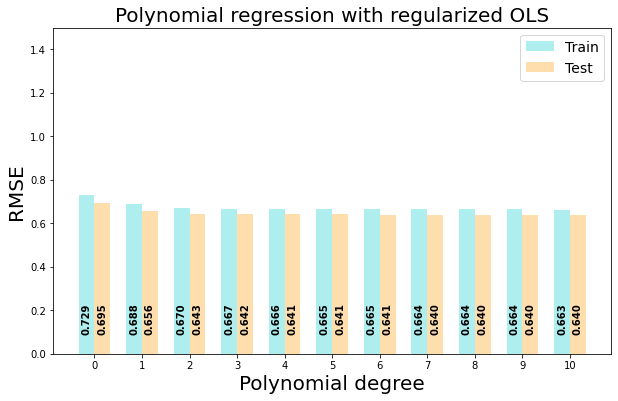

In [31]:
rmse_poly_ols_reg_train = []
rmse_poly_ols_reg_test = []

degree = 1
for poly_ols in poly_ols_reg_all:
    # compute RMSE
    rmse_train = rmse(y_train, poly_ols.predict(X_train))
    rmse_test = rmse(y_test, poly_ols.predict(X_test))

    # store RMSE
    rmse_poly_ols_reg_train.append(rmse_train)
    rmse_poly_ols_reg_test.append(rmse_test)

    # print RMSE
    print("Degree:", degree, "- RMSE train:", rmse_train, "- RMSE test:", rmse_test)
    degree += 1

# plot RMSE
plot_train_test_rmse(rmse_poly_ols_reg_train, rmse_poly_ols_reg_test,
    title="Polynomial regression with regularized OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)